In [1]:
spark

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyspark.sql.functions import col, isnan, when, count, udf, to_date, year, month, date_format, size, split, lead
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.window import Window
from pyspark.ml import Pipeline



In [3]:
import io
from google.cloud import storage
import requests

storage_client = storage.Client()

blobs = storage_client.list_blobs('my-project-bucket-ls')

for blob in blobs:
    print(blob.name)

cleaned/
cleaned/A.US_D1.parquet
cleaned/AAL.US_D1.parquet
cleaned/AAPL.US_D1.parquet
cleaned/ABBV.US_D1.parquet
cleaned/ABNB.US_D1.parquet
cleaned/ABT.US_D1.parquet
cleaned/ACGL.US_D1.parquet
cleaned/ACN.US_D1.parquet
cleaned/ADBE.US_D1.parquet
cleaned/ADI.US_D1.parquet
cleaned/ADM.US_D1.parquet
cleaned/ADP.US_D1.parquet
cleaned/ADSK.US_D1.parquet
cleaned/AEE.US_D1.parquet
cleaned/AEP.US_D1.parquet
cleaned/AES.US_D1.parquet
cleaned/AFL.US_D1.parquet
cleaned/AIG.US_D1.parquet
cleaned/AIZ.US_D1.parquet
cleaned/AJG.US_D1.parquet
cleaned/AKAM.US_D1.parquet
cleaned/ALB.US_D1.parquet
cleaned/ALGN.US_D1.parquet
cleaned/ALL.US_D1.parquet
cleaned/ALLE.US_D1.parquet
cleaned/AMAT.US_D1.parquet
cleaned/AMCR.US_D1.parquet
cleaned/AMD.US_D1.parquet
cleaned/AME.US_D1.parquet
cleaned/AMGN.US_D1.parquet
cleaned/AMP.US_D1.parquet
cleaned/AMT.US_D1.parquet
cleaned/AMZN.US_D1.parquet
cleaned/ANET.US_D1.parquet
cleaned/ANSS.US_D1.parquet
cleaned/AON.US_D1.parquet
cleaned/AOS.US_D1.parquet
cleaned/APA.US_D

In [4]:
data_path = "gs://my-project-bucket-ls/cleaned/*.parquet"
df = spark.read.parquet(data_path)


In [6]:
sample_df = df.select("open", "high", "low", "close")


In [7]:
sample_df = df.sample(False, 0.2)

In [8]:
if "close" not in df.columns:
    raise Exception("Close column is missing from the dataset")


In [9]:
df = spark.read.parquet(data_path)

if "close" not in df.columns:
    raise Exception("Close column is missing from the dataset")

sample_df = df.sample(False, 0.2)


In [17]:
train_df.select(feature_cols).printSchema()


NameError: name 'feature_cols' is not defined

In [14]:
feature_cols = ['open', 'high', 'low', 'close']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_unscaled")
scaler = MinMaxScaler(inputCol="features_unscaled", outputCol="features")


In [12]:
print(df.columns)

['datetime', 'open', 'high', 'low', 'close', 'volume', 'bbands_20_upperband', 'bbands_20_middleband', 'bbands_20_lowerband', 'dema_20', 'ema_20', 'ema_60', 'kama_20', 'kama_60', 'ma_20', 'ma_60', 'sma_20', 'sma_60', 'tema_20', 'tema_60', 'adx_20', 'adx_60', 'macd_20_40_10_macd', 'macd_60_120_30_macd', 'rsi_20', 'rsi_60']


In [14]:
from pyspark.sql.functions import when

sample_df = sample_df.withColumn("close_gt_open", when(col("close") > col("open"), 1).otherwise(0))


In [15]:
train_df, test_df = sample_df.randomSplit([0.8, 0.2], seed=42)


In [25]:
train_df = train_df.filter(train_df.next_day_close.isNotNull())
test_df = test_df.filter(test_df.next_day_close.isNotNull())


24/05/15 17:18:03 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/05/15 17:18:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Root Mean Squared Error (RMSE) on test data = 3.664069170248818
Coefficient of Determination (R²) on test data = 0.9994816129711116


Intercept:  -0.35574818001154535
Coefficients: 
open: -0.09934335441027588
high: 0.20905681199379966
low: 0.22700657604173652
close: 0.635201372713094
volume: 7.996384781909866e-11
bbands_20_upperband: -0.00019570826502958118
bbands_20_middleband: -0.0007687405016120994
bbands_20_lowerband: -0.0014871176311252925
dema_20: 0.00986329127922599
ema_20: 0.005604128437996875
ema_60: 0.0017614901186945534
kama_20: 0.010156257188281089
kama_60: -0.010114514192647557
ma_20: -0.0007687405056510398
ma_60: -0.011293420489282549
sma_20: -0.0007687405040960389
sma_60: -0.011293420489836517
tema_20: 0.026992918288386947
tema_60: 0.01128839989632311
adx_20: -0.0011282300557033836
adx_60: 0.0005114243854562294
macd_20_40_10_macd: -0.11698336384002558
macd_60_120_30_macd: -0.001074209492195514
rsi_20: 0.009705031146139324
rsi_60: -0.002754525307646812


+----------+------+------------------+------+------+------+--------------+------------------+
|  datetime|symbol|              open|  high|   low| close|next_day_close|        prediction|
+----------+------+------------------+------+------+------+--------------+------------------+
|1998-09-16|  TECH|              14.0| 14.25| 13.69| 14.25|         14.25| 14.10510873025411|
|1998-09-16|   NEM|             19.38| 19.38| 18.81| 18.88|         20.75| 18.96064541298137|
|1998-09-16|   FRT|              21.0| 21.69|  21.0| 21.62|         21.56|21.541327080717583|
|1998-09-16|   SHW|             22.56| 22.69|  21.5| 21.56|         20.94|21.567483035267962|
|1998-09-16|   PHM|             27.75| 28.06| 27.31| 27.69|         27.25|27.673497301391127|
|1998-09-16|   BAC|             28.33| 29.69| 28.25|  29.5|         28.03|29.300656919742067|
|1998-09-16|  ORLY|             31.88|  32.5| 31.75| 31.75|         32.01|31.870182977743546|
|1998-09-16|   CMS|             40.31| 41.13| 40.31| 40.88| 

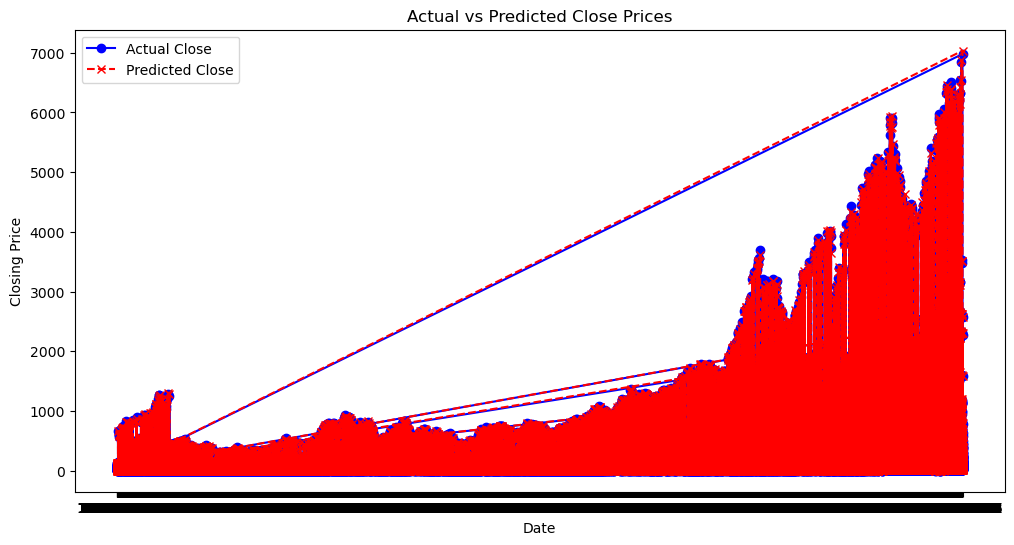

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, input_file_name, regexp_extract, lead
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .appName("Predictive Stock Price Modeling") \
    .getOrCreate()

data_path = "gs://my-project-bucket-ls/cleaned/*.parquet"
df = spark.read.parquet(data_path).withColumn("file_path", input_file_name())
df = df.withColumn("symbol", regexp_extract("file_path", "cleaned/(.+?)\.US_", 1))
windowSpec = Window.partitionBy("symbol").orderBy("datetime")
df = df.withColumn("next_day_close", lead("close", 1).over(windowSpec))
df = df.dropna()

feature_cols = ['open', 'high', 'low', 'close', 'volume', 
                'bbands_20_upperband', 'bbands_20_middleband', 'bbands_20_lowerband', 
                'dema_20', 'ema_20', 'ema_60', 'kama_20', 'kama_60', 'ma_20', 'ma_60', 
                'sma_20', 'sma_60', 'tema_20', 'tema_60', 'adx_20', 'adx_60', 
                'macd_20_40_10_macd', 'macd_60_120_30_macd', 'rsi_20', 'rsi_60']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="next_day_close")
pipeline = Pipeline(stages=[assembler, lr])
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .addGrid(lr.maxIter, [10, 100]) \
    .build()
evaluator = RegressionEvaluator(labelCol="next_day_close", predictionCol="prediction", metricName="rmse")
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3, seed=42)

train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
cvModel = crossval.fit(train_df)

df_with_features = assembler.transform(df)
df_with_features.write.mode('overwrite').parquet('gs://my-project-bucket-ls/trusted/')

predictions = cvModel.bestModel.transform(test_df)

rmse = evaluator.evaluate(predictions)
r2_evaluator = RegressionEvaluator(labelCol="next_day_close", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")
print(f"Coefficient of Determination (R²) on test data = {r2}")

model_path = "gs://my-project-bucket-ls/models/stock_price_model"
cvModel.bestModel.write().overwrite().save(model_path)


bestLRModel = cvModel.bestModel.stages[-1]
print("Intercept: ", bestLRModel.intercept)
print("Coefficients: ")
for coeff, feature in zip(bestLRModel.coefficients, feature_cols):
    print(f"{feature}: {coeff}")
    
predictions.select("datetime", "symbol", "open", "high", "low", "close", "next_day_close", "prediction").show(100)


predictions_pd = predictions.select("datetime", "next_day_close", "prediction").toPandas()

plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['datetime'], predictions_pd['next_day_close'], label='Actual Close', marker='o', linestyle='-', color='blue')
plt.plot(predictions_pd['datetime'], predictions_pd['prediction'], label='Predicted Close', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

spark.stop()


RMSE: 3.6466834788196, R-squared: 0.999486520703308
Coefficients: [-0.14885009031910412,0.1510408776565994,0.16947971234162068,0.8087412616356381,9.585190416714208e-11,0.0007854699256658579,0.0007287863662622497,0.0006131859271191195,0.021386684989358137,0.006966337537845554,-0.021094570516189844,0.01213024203861357,-0.01176889210783623,0.0007287864263354143,-0.021116097238374043,0.0007287864203409828,-0.02111609727657725,0.03186557750008612,0.01968949987658627,-0.000949849607028096,0.0006520218902134277,-0.23328933507003777,-0.0013322102090583046,0.0012486301199653251,0.004565203869202771]
Intercept: -0.3003516549418735


24/05/15 20:42:48 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_22129_4 !
24/05/15 20:42:48 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_22129_0 !
24/05/15 20:42:48 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_22129_2 !
24/05/15 20:42:48 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_22165_3 !
24/05/15 20:42:48 WARN BlockManagerMasterEndpoint: No more replicas available for rdd_22165_1 !
24/05/15 20:42:49 WARN YarnAllocator: Container from a bad node: container_1715793151497_0002_01_000025 on host: cluster-54c9-m.us-central1-a.c.kinetic-highway-415115.internal. Exit status: 143. Diagnostics: [2024-05-15 20:42:48.961]Container killed on request. Exit code is 143
[2024-05-15 20:42:48.962]Container exited with a non-zero exit code 143. 
[2024-05-15 20:42:48.962]Killed by external signal
.
24/05/15 20:42:49 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 25 for rea

Best Model Parameters:
aggregationDepth: 2
elasticNetParam: 0.0
epsilon: 1.35
featuresCol: features
fitIntercept: True
labelCol: next_day_close
loss: squaredError
maxBlockSizeInMB: 0.0
maxIter: 100
predictionCol: prediction
regParam: 0.001
solver: auto
standardization: True
tol: 1e-06


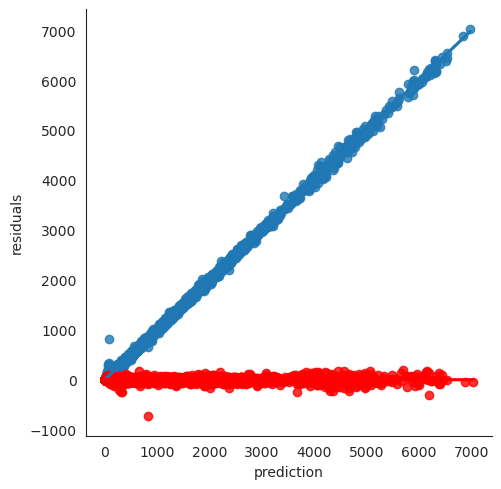

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, input_file_name, regexp_extract, lead
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spark = SparkSession.builder \
    .appName("Predictive Stock Price Modeling") \
    .getOrCreate()

data_path = "gs://my-project-bucket-ls/cleaned/*.parquet"
df = spark.read.parquet(data_path).withColumn("file_path", input_file_name())
df = df.withColumn("symbol", regexp_extract("file_path", "cleaned/(.+?)\.US_", 1))
windowSpec = Window.partitionBy("symbol").orderBy("datetime")
df = df.withColumn("next_day_close", lead("close", 1).over(windowSpec))
df = df.dropna()

feature_cols = ['open', 'high', 'low', 'close', 'volume', 
                'bbands_20_upperband', 'bbands_20_middleband', 'bbands_20_lowerband', 
                'dema_20', 'ema_20', 'ema_60', 'kama_20', 'kama_60', 'ma_20', 'ma_60', 
                'sma_20', 'sma_60', 'tema_20', 'tema_60', 'adx_20', 'adx_60', 
                'macd_20_40_10_macd', 'macd_60_120_30_macd', 'rsi_20', 'rsi_60']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol="next_day_close")
pipeline = Pipeline(stages=[assembler, lr])
paramGrid = ParamGridBuilder() \
    .addGrid(lr.fitIntercept, [True, False]) \
    .addGrid(lr.regParam, [0.001, 0.01, 0.1, 1, 10]) \
    .addGrid(lr.elasticNetParam, [0, 0.25, 0.5, 0.75, 1]) \
    .build()

evaluator = RegressionEvaluator(labelCol="next_day_close", predictionCol="prediction", metricName="rmse")
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3, seed=42)

train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
cvModel = crossval.fit(train_df)

predictions = cvModel.bestModel.transform(test_df)
rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})
print(f"RMSE: {rmse}, R-squared: {r2}")
  
bestModel = cvModel.bestModel.stages[-1]
coefficients = bestModel.coefficients
intercept = bestModel.intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

model = crossval.fit(train_df)

# Get the best model from the cross-validation
bestPipelineModel = model.bestModel
bestLRModel = bestPipelineModel.stages[-1]  # This assumes LinearRegression is the last stage

# Extract and print the best model's parameters
bestParams = bestLRModel.extractParamMap()
print("Best Model Parameters:")
for param, value in bestParams.items():
    print(f"{param.name}: {value}")

# Use the best model from the cross-validation to make predictions on the test data
test_results = bestPipelineModel.transform(test_df)

df_pd = predictions.select('next_day_close', 'prediction').toPandas()
sns.set_style("white")
sns.lmplot(x='next_day_close', y='prediction', data=df_pd)

df_pd['residuals'] = df_pd['next_day_close'] - df_pd['prediction']
sns.regplot(x='prediction', y='residuals', data=df_pd, scatter=True, color='red')

df_with_features = assembler.transform(df)
df_with_features.write.mode('overwrite').parquet('gs://my-project-bucket-ls/trusted/')
cvModel.bestModel.write().overwrite().save('gs://my-project-bucket-ls/models/stock_price_model')

plt.show()

spark.stop()
